# Imports,  Settings and Paths

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import time

In [2]:
from Code.Models.c7o2h10_model import train, backtransform
from Code.Models.h2o_model import DeepPotential

In [3]:
data_path = './Dataset/h2o_X.npy'
label_path = './Dataset/h2o_Y.npy'
model_path = './ModelCheckpoints/h2o/ '

In [4]:
cuda = torch.device('cuda')

# Read the Data

In [5]:
X_train_npy = np.load(data_path)
Y_train_npy = np.load(label_path) * -1
X_train_npy.shape

(1000, 3, 8)

### Check for NaN values

In [6]:
use_ids = np.where(np.isnan(X_train_npy).sum(axis=2).sum(axis=1)==0)
print('{} Datapoints with NaN values found.'.format(X_train_npy.shape[0] - len(use_ids[0])))

0 Datapoints with NaN values found.


In [7]:
X_train_npy = X_train_npy[use_ids]
Y_train_npy = Y_train_npy[use_ids]
X_train_npy.shape

(1000, 3, 8)

### Shuffle the Dataset

In [8]:
shuffle = np.arange(X_train_npy.shape[0])
np.random.shuffle(shuffle)
X_train_npy = X_train_npy[shuffle]
Y_train_npy = Y_train_npy[shuffle]

### Normalize Dataset

In [9]:
#Y_min = Y_train_npy.min()
#Y_train_npy -= Y_min
#Y_max = Y_train_npy.max()
#Y_train_npy /= Y_max

In [10]:
#print('Mean: {}\nVariance: {}'.format(Y_train_npy.mean(), Y_train_npy.var()))

### Create Pytorch Variables

In [11]:
X_data = Variable(torch.Tensor(X_train_npy).cuda())
Y_max = Y_train_npy.max()
Y_data = Variable(torch.Tensor(Y_train_npy).cuda(), requires_grad=False)

In [12]:
Y_data.min()

tensor(13802.4395, device='cuda:0')

# Train Model

## Do the learning

In [13]:
torch.cuda.is_available()

True


Epoch: 0	learning rate: 0.1
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_0


Epoch: 1	learning rate: 0.09748
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_1


Epoch: 2	learning rate: 0.09503
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_2


Epoch: 3	learning rate: 0.09263
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_3


Epoch: 4	learning rate: 0.0903
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_4


Epoch: 5	learning rate: 0.08802
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_5


Epoch: 6	learning rate: 0.08581
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_6


Epoch: 7	learning rate: 0.08364
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_7


Epoch: 8	learning rate: 0.08154
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_8


Epoch: 9	learning rate: 0.07948
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_9


Epoch: 10	learning rate: 0.07748
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_10


E

saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_89


Epoch: 90	learning rate: 0.01006
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_90


Epoch: 91	learning rate: 0.00981
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_91


Epoch: 92	learning rate: 0.00956
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_92


Epoch: 93	learning rate: 0.00932
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_93


Epoch: 94	learning rate: 0.00909
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_94


Epoch: 95	learning rate: 0.00886
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_95


Epoch: 96	learning rate: 0.00864
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_96


Epoch: 97	learning rate: 0.00842
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_97


Epoch: 98	learning rate: 0.00821
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_98


Epoch: 99	learning rate: 0.008
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_99


Epoch: 100	learn

saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_177


Epoch: 178	learning rate: 0.00107
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_178


Epoch: 179	learning rate: 0.00104
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_179


Epoch: 180	learning rate: 0.00101
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_180


Epoch: 181	learning rate: 0.00099
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_181


Epoch: 182	learning rate: 0.00096
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_182


Epoch: 183	learning rate: 0.00094
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_183


Epoch: 184	learning rate: 0.00091
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_184


Epoch: 185	learning rate: 0.00089
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_185


Epoch: 186	learning rate: 0.00087
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_186


Epoch: 187	learning rate: 0.00085
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch

saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_264


Epoch: 265	learning rate: 0.00012
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_265


Epoch: 266	learning rate: 0.00011
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_266


Epoch: 267	learning rate: 0.00011
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_267


Epoch: 268	learning rate: 0.00011
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_268


Epoch: 269	learning rate: 0.0001
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_269


Epoch: 270	learning rate: 0.0001
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_270


Epoch: 271	learning rate: 0.0001
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_271


Epoch: 272	learning rate: 0.0001
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_272


Epoch: 273	learning rate: 9e-05
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_273


Epoch: 274	learning rate: 9e-05
---
saved checkpoint at: ./ModelCheckpoints/h2o/ epoch_274


E

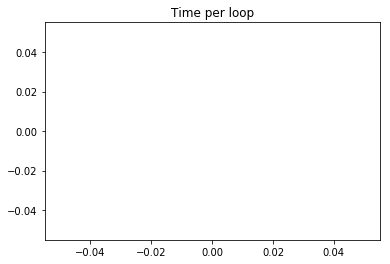

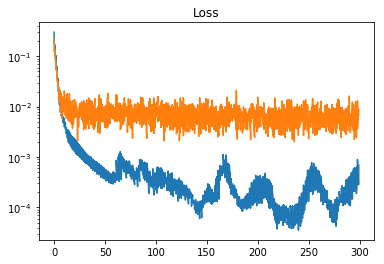

In [14]:
init_deep_pot = DeepPotential().cuda()
init_optim = torch.optim.Adam(init_deep_pot.parameters())
deep_pot, optim = train(init_deep_pot, init_optim, X_data, Y_data, 300, 128,
                        (1e-1, 0.96, 1.6), print_every=10,
                        checkpoint_path=model_path, use_for_train=0.9)

# Small test sample

In [15]:
test_size = 100

In [16]:
Y_pred = backtransform(deep_pot.forward(X_data[-test_size:]), Y_data.min(), Y_data.max())*0.043#.subtract(Y_data[-50:]**2)

In [17]:
Y_test = Y_data[-test_size:] * 0.043

**The result should be around 1.8 meV/molecule**

In [18]:
np.abs(Y_pred.data.numpy().reshape(test_size)
       - Y_test.data.numpy().reshape(test_size)
            ).mean()

TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
Y_pred[-20:]

In [ ]:
Y_test[-20:]